<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<hr>
<h1><center>MACHINE LEARNING : HOMEWORK 1</center></h1>
<h1><center>Data 1 : Wealth prediction</center></h1>
<h4>Hector LANDES - M10601810</h4>
<h4>Machine Learning - CS5087701</h4>

In [2]:
#!conda install -c conda-forge pydotplus -y
#pip install graphviz
#pip install pydotplus
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as py
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'
%matplotlib inline 

<hr>
<div id="Import the data">
    <h2>Import the data</h2>
</div>

In [3]:
path = r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\adult.csv'

In [4]:
data = pd.read_csv (path, names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                                 "hours_per_week", "native_country", "wealth"],
                   index_col=False)

<hr>
<div id="Data checking">
    <h3>Data checking</h3>
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wealth            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
len(data)

32561

In [7]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wealth
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
new = data[['education_num', 'education']].copy()
new

,education_num,education
0,13,Bachelors
1,13,Bachelors
2,9,HS-grad
3,7,11th
4,13,Bachelors
5,14,Masters
6,5,9th
7,9,HS-grad
8,14,Masters
9,13,Bachelors


<hr>
<div id="Data preprocessing">
    <h2>Data preprocessing</h2>
</div>

<h3>ID3</h3> (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

<h3>C4.5</h3> is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

<h3>C5.0</h3> is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

<h3>CART</h3> (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

<h3>Drop missing values rows</h3>

In [9]:
data.isin([' ?', '? ', '?', "NaN"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
wealth            False
dtype: bool

In [10]:
data = data[(data.astype(str) != ' ?').all(axis=1)]

In [11]:
data.isin([' ?', '? ', '?', "NaN"]).any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
wealth            False
dtype: bool

In [12]:
len(data)

30162

Because, CART does not support categorical variables, I will create dummies for each categorical variables.
Let's start with: 
<ul>
<b> Tranform all the categorical values into dummies values </b> 
</ul>

In [13]:
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'])

In [14]:
data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,wealth,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,Cuba,<=50K,0,0,...,0,0,1,0,0,1,0,0,1,0


<ul>
<b>Check the quantity of observations for natives country and the distribution of these countries </b></ul>

In [15]:
data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
data['native_country'] = data['native_country'].str.strip()

In [17]:
data['native_country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Taiwan                           42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [18]:
print('Observations with native country as USA represent %0.2f' % (27504/30162*100), '% of the total observations')

Observations with native country as USA represent 91.19 % of the total observations


Because native country as as USA over represent the total data, I will regroup other country per region such as:
<ul><b>Asia</b>: Philippines, India, China, Vietnam, Japan, Taiwan, Iran, Hong-Kong, Cambodia, Laos, Thailand  </ul>
<ul><b>Europe</b>: Germany, England, Italy, Poland, Portugal, Greece, France, Ireland, Yugoslavia, Hungary, Scotland, Holand-Netherlands  </ul>
<ul><b>Central and South America</b>: Mexico, El-Salvador, Cuba, Jamaica, South, Dominican-Republic, Guatemala, Columbia, Haiti, Nicaragua, Peru, Ecuador, Trinadad-Tobago, Honduras  </ul>
<ul><b>Central and South America</b>: United-States, Canada, Puerto-Rico, Outlying-US(Guam-USVI-etc) </ul>



In [19]:
data['native_country'] = data['native_country'].replace(['Japan', 'Cambodia', "Philippines", 
                                                         "India", "China", "Vietnam", "Taiwan", "Iran", 
                                                         "Hong", "Laos", "Thailand"], 'Asia')
data['native_country'] = data['native_country'].replace(["Germany", "England", "Italy", "Poland", "Portugal",
                                                         "Greece", "France", "Ireland", "Yugoslavia", "Hungary", 
                                                         "Scotland", "Holand-Netherlands"], 'Europe')
data['native_country'] = data['native_country'].replace(["Mexico","El-Salvador", "Cuba", "Jamaica", 'South', 
                                                         "Dominican-Republic", "Guatemala", "Columbia", "Haiti", 
                                                         "Nicaragua", "Peru", "Ecuador", "Trinadad&Tobago", "Honduras"], 
                                                        'South&Central America')
data['native_country'] = data['native_country'].replace(["United-States", 'Puerto-Rico', 'Canada',
                                                         'Outlying-US(Guam-USVI-etc)'], 'United_States')

In [20]:
data.native_country.unique()

array(['United_States', 'South&Central America', 'Asia', 'Europe'],
      dtype=object)

In [21]:
data.rename(columns={'native_country':'native_region'}, inplace=True)

In [22]:
data = pd.get_dummies(data, columns=['native_region'])

<ul>
<b>Check the quantity of observations for capital loss and the distribution of these losses </b></ul>

In [23]:
non_zero_value = data.loc[data["capital_loss"] != 0]

In [24]:
print("There is %d observations with a capital loss, which is only %0.2f"
      % (non_zero_value["capital_loss"].count()
         , non_zero_value["capital_loss"].count()/len(data)*100)
      , '% of the total observations')

There is 1427 observations with a capital loss, which is only 4.73 % of the total observations


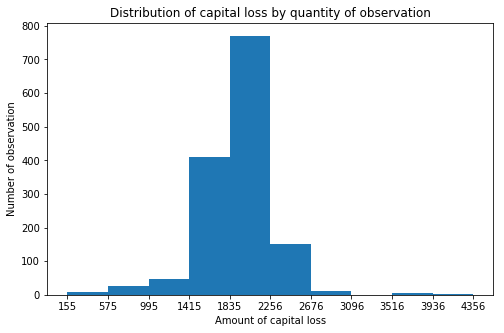

In [25]:
count, bin_edges = np.histogram(non_zero_value["capital_loss"], bins = 10)

non_zero_value["capital_loss"].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Distribution of capital loss by quantity of observation') # add a title to the histogram
plt.ylabel('Number of observation') # add y-label
plt.xlabel('Amount of capital loss') # add x-label

plt.show()

Because the quantity of observation with an effective capital loss is very small, and because the amount of loss is evenly distributed between 1415$ and 2676$, I will consider the attribute capital loss as a binary attributes, such as capital loss = 0 when there is no loss and = 1 when there is a loss.
In such a way I can keep the information of this attributes for the prediction without influencing too much the prediction with this continuous variable.

In [26]:
data.loc[data["capital_loss"] != 0, ["capital_loss"]] = 1

<ul>
<b>Check the quantity of observations for capital gain and the distribution of these gains</b>
</ul>

In [27]:
non_zero_value = data.loc[data["capital_gain"] != 0]

In [28]:
print("There is %d observations with a capital gain, which is only %0.2f"
      % (non_zero_value["capital_gain"].count()
         , non_zero_value["capital_gain"].count()/len(data)*100)
      , '% of the total observations')

There is 2538 observations with a capital gain, which is only 8.41 % of the total observations


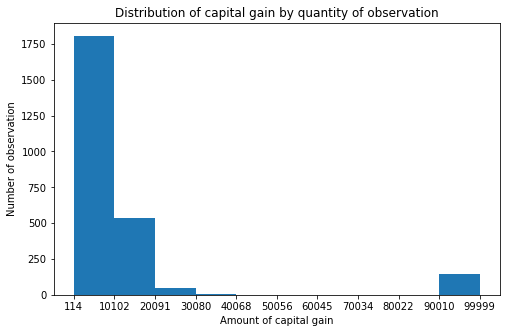

In [29]:
count, bin_edges = np.histogram(non_zero_value["capital_gain"], bins = 10)

non_zero_value["capital_gain"].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Distribution of capital gain by quantity of observation') # add a title to the histogram
plt.ylabel('Number of observation') # add y-label
plt.xlabel('Amount of capital gain') # add x-label

plt.show()

WIth the same reasoning as capital loss, I will create a binary attribute with capital gain

In [30]:
data.loc[data["capital_gain"] != 0, ["capital_gain"]] = 1

<ul>
<b>Check the attributes fnlwgt</b>
</ul>

According to the data source, fnlwgt represents the final weight. In other words, this is the number of people the census believes the entry represents. Therefore, I will delete it.

In [31]:
data = data.drop(['fnlwgt'], axis=1)

<ul>
<b>Check the target varaibles, wealth</b>
</ul>

In [32]:
data['bi_wealth'] = data.apply(lambda row: 1 if '>50K'in row['wealth'] else 0, axis=1)

In [33]:
print(data['bi_wealth'].value_counts())
print(data['wealth'].value_counts())

0    22654
1     7508
Name: bi_wealth, dtype: int64
 <=50K    22654
 >50K      7508
Name: wealth, dtype: int64


In [34]:
data = data.drop(['wealth'], axis=1)

In [35]:
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States,bi_wealth
0,39,13,1,0,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,7,0,0,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


<ul>
<b> X </b> as the <b> Feature Matrix </b> 
</ul>

In [36]:
X = data[data.columns[:66]]
X[0:2]

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States
0,39,13,1,0,40,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


<ul>
    <li> <b> Y </b> as the <b> Target Value </b> </li>
</ul>

In [37]:
Y = data["bi_wealth"]
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: bi_wealth, dtype: int64

Now we will split the data in training and testing data

In [38]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [39]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (24129, 66)    Testing: (6033, 66)
Target value   ->   Training: (24129,)       Testing: (6033,)


<hr>
<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>richTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

<h3>Double Cross-validation for different tree dept and minimum node size</h3>

In [144]:
avg_test_accuracy = []
maximum_dept = []
minimum_node_size = []

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=5, random_state=42)
for max_depth in range(2, 20):
    for min_node_size in range(5, 30, 5):
        richTree = DecisionTreeClassifier(criterion='entropy', 
                                          max_depth=max_depth,
                                          min_samples_leaf=min_node_size)
        results = model_selection.cross_validate(estimator=richTree,
                                                 X=X_trainset,
                                                 y=Y_trainset,
                                                 cv=kfold,
                                                 scoring=scoring)
        avg_test_accuracy.append(results['test_accuracy'].mean())
        maximum_dept.append(max_depth)
        minimum_node_size.append(min_node_size)

        print("max_dept = {}, min_node_size = {}, accuracy={}, precision = {}, recall = {}, f1-score = {}".format(
            max_depth, 
            min_node_size,
            results['test_accuracy'].mean(),
            results['test_precision'].mean(),
            results['test_recall'].mean(),
            results['test_f1_score'].mean()))

max_dept = 2, min_node_size = 5, accuracy=0.8163204404467168, precision = 0.730236051089181, recall = 0.40548988204240216, f1-score = 0.5213817093772786
max_dept = 2, min_node_size = 10, accuracy=0.8163204404467168, precision = 0.730236051089181, recall = 0.40548988204240216, f1-score = 0.5213817093772786
max_dept = 2, min_node_size = 15, accuracy=0.8163204404467168, precision = 0.730236051089181, recall = 0.40548988204240216, f1-score = 0.5213817093772786
max_dept = 2, min_node_size = 20, accuracy=0.8163204404467168, precision = 0.730236051089181, recall = 0.40548988204240216, f1-score = 0.5213817093772786
max_dept = 2, min_node_size = 25, accuracy=0.8163204404467168, precision = 0.730236051089181, recall = 0.40548988204240216, f1-score = 0.5213817093772786
max_dept = 3, min_node_size = 5, accuracy=0.8167763045163395, precision = 0.7288633847100451, recall = 0.41019576439534333, f1-score = 0.5248572293502118
max_dept = 3, min_node_size = 10, accuracy=0.8167763045163395, precision = 0.

max_dept = 12, min_node_size = 25, accuracy=0.8309500739732323, precision = 0.7069017382989464, recall = 0.5382789753450471, f1-score = 0.6109609881513078
max_dept = 13, min_node_size = 5, accuracy=0.8227024944761643, precision = 0.6698827110124113, recall = 0.5631898241377953, f1-score = 0.6097470142891656
max_dept = 13, min_node_size = 10, accuracy=0.8265982662993414, precision = 0.6847536441534625, recall = 0.5598832604596882, f1-score = 0.6133232954727948
max_dept = 13, min_node_size = 15, accuracy=0.827758690512745, precision = 0.6853182849025035, recall = 0.5652220201171162, f1-score = 0.6173786673186741
max_dept = 13, min_node_size = 20, accuracy=0.8303281319450557, precision = 0.6957177016650627, recall = 0.5636411118100535, f1-score = 0.6205784334671653
max_dept = 13, min_node_size = 25, accuracy=0.8292507123547107, precision = 0.6915227309909986, recall = 0.5625748301766673, f1-score = 0.6184979862451361
max_dept = 14, min_node_size = 5, accuracy=0.823655879529921, precision 

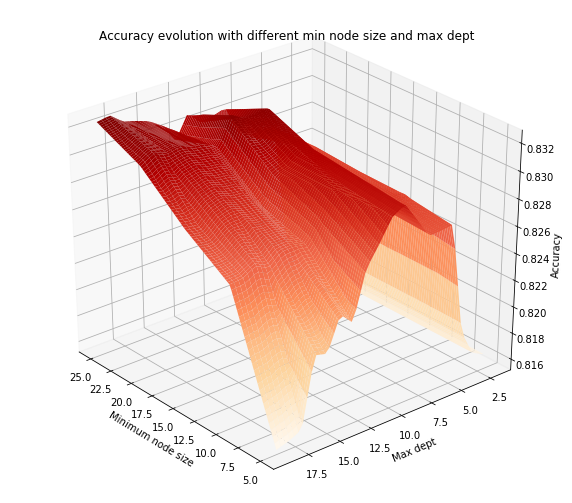

In [154]:
X = minimum_node_size
Y = maximum_dept
Z = avg_test_accuracy

plotx,ploty, = np.meshgrid(np.linspace(np.min(X),np.max(X),100),\
                           np.linspace(np.min(Y),np.max(Y),50))
plotz = interp.griddata((X,Y),Z,(plotx,ploty),method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx,ploty,plotz,cstride=1,rstride=1,cmap='OrRd')
ax.set_ylabel('Max dept')
ax.set_xlabel('Minimum node size')
ax.set_zlabel('Accuracy')
plt.rcParams['figure.figsize'] = (10,9)
plt.rcParams['font.size'] = 10
ax.set_title('Accuracy evolution with different min node size and max dept')
ax.view_init(30, 140)

In [158]:
avg_test_accuracy.sort()
avg_test_accuracy[-5:]

[0.8318619223592416,
 0.8320274506183045,
 0.8324004904350142,
 0.8324421044042524,
 0.8326078903349516]

<ul>For accuracy = <b>83.27%</b> we have max_dept = <b>18</b>, min_node_size = <b>25</b></ul>
<ul>For accuracy = <b>83.24%</b> we have max_dept = <b>19</b>, min_node_size = <b>25</b></ul>
<ul>For accuracy = <b>83.23%</b> we have max_dept = <b>12</b>, min_node_size = <b>20</b></ul>
<ul>For accuracy = <b>83.23%</b> we have max_dept = <b>12</b>, min_node_size = <b>20</b></ul>
<ul>For accuracy = <b>83.21%</b> we have max_dept = <b>9</b>, min_node_size = <b>20</b></ul>
<ul>For accuracy = <b>83.19%</b> we have max_dept = <b>10</b>, min_node_size = <b>20</b></ul>
Since the computational cost and decision tree readability are important variables to determine the best parameters,
<ul><b>I will choose the accuracy 83.21% with max_dept = 9, min_node_size = 20</b></ul>


In [80]:
richTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9, min_samples_leaf = 20)
richTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> Y_trainset </b>

In [81]:
richTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [82]:
predTree = richTree.predict(X_testset)

In [83]:
print (predTree [0:5])
print (Y_testset [0:5])

[0 0 1 0 0]
10872    0
10984    0
3475     1
10871    0
32048    0
Name: bi_wealth, dtype: int64


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
</div>

In [84]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.831592905685397


<h3>Confusion Matrix</h3>

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.93 0.07]
 [0.44 0.56]]


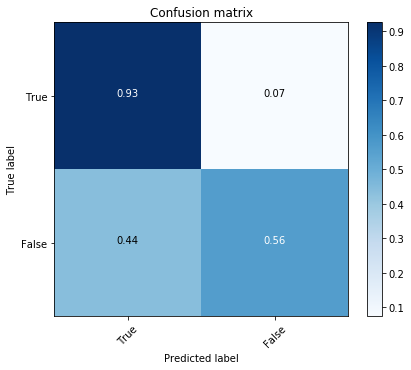

In [123]:
cnf_matrix = confusion_matrix(Y_testset, predTree)
np.set_printoptions(precision=2)
plt.figure()
plt.rcParams['figure.figsize'] = (4,3)
plot_confusion_matrix(cnf_matrix, classes=['True','False'],normalize= True,  title='Confusion matrix')

In [87]:
report = classification_report(Y_testset, predTree)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4478
           1       0.72      0.56      0.63      1555

   micro avg       0.83      0.83      0.83      6033
   macro avg       0.79      0.74      0.76      6033
weighted avg       0.82      0.83      0.82      6033



<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

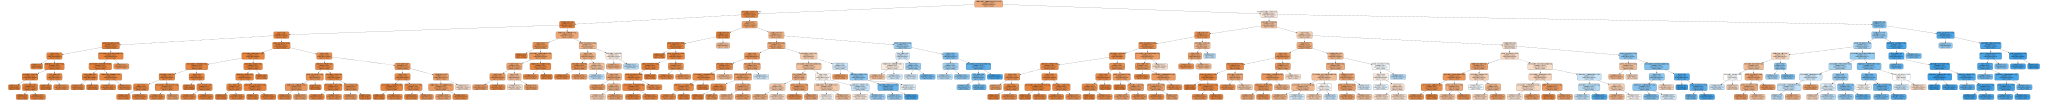

In [88]:
dot_data = tree.export_graphviz(richTree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_trainset), class_names=['<=50K', '>50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

<h1><center>Source</center></h1> 
<li>https://itnext.io/learning-data-science-predict-adult-income-with-decision-tree-ae8dd57a76cc</li>
<li>https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
<li>https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf</li>
<li></li>
<li></li>
<li></li>


Post-pruning → Given full tree, convert each path in rules of conjunction and disjunction. Remove subtree for better generalization (decrease variance). More accurate than pre

Rule-Post Pruning
Translate each path in rules (conjunction and disjunction)
Select randomly one path
Remove this path
Re run the tree
If better accuracy, keep rules removed, if slightly worse, keep removed (principle of parsimony), see if decrease of size is more interesting to increase of inpuritty (determine the GainRatio instead of the Ratio)
If worse accuracy, re put the rules and try with another until max accuracy reached. 

https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/

<li> Do I have choose those parameters -> DecisionTreeClassifier(class_weight=None, min_impurity_decrease=0.9)? </li>
<li> Do I need to do dumies for age, udecation_num and work_per_week? Because in the deicsion tree, its divde the value? </li>
<li> The tree is very big, is bad? </li>
<li> For the Bonus question I do not have idea </li>